In [8]:
import keras
keras.__version__

'2.2.2'

In [9]:
import os, shutil

In [14]:

#veri setimizin tamamının bulunduğu dizin.
original_dataset_dir = 'c:/images'

# Veri setimizi ayırmak için (test/train/validation) oluşturduğumuz dosya 
base_dir = 'c:/powerbankandtassel'
os.mkdir(base_dir)

# Ana veri seti dosyamızın içine test/train/validation dosyalarımızı oluşturuyoruz.
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# powerbank için train dosyası içerisinde veri setimiz (fotoğraflarımız) bulunacak.
train_powerbank_dir = os.path.join(train_dir, 'powerbank')
os.mkdir(train_powerbank_dir)

# tassel için train dosyası içerisinde veri setimiz (fotoğraflarımız) bulunacak.
train_tassel_dir = os.path.join(train_dir, 'tassel')
os.mkdir(train_tassel_dir)

# powerbank için validation dosyası içerisinde veri setimiz (fotoğraflarımız) bulunacak.
validation_powerbank_dir = os.path.join(validation_dir, 'powerbank')
os.mkdir(validation_powerbank_dir)

# tassel için validation dosyası içerisinde veri setimiz (fotoğraflarımız) bulunacak.
validation_tassel_dir = os.path.join(validation_dir, 'tassel')
os.mkdir(validation_tassel_dir)

# powerbank için test dosyası içerisinde veri setimiz (fotoğraflarımız) bulunacak.
test_powerbank_dir = os.path.join(test_dir, 'powerbank')
os.mkdir(test_powerbank_dir)

# battery için test dosyası içerisinde veri setimiz (fotoğraflarımız) bulunacak.
test_tassel_dir = os.path.join(test_dir, 'tassel')
os.mkdir(test_tassel_dir)

In [15]:
# tassel train verisi için 75 fotoğraf ayırdık
fnames = ['{}.jpeg'.format(i) for i in range(75)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_tassel_dir, fname)
    shutil.copyfile(src, dst)
    
# tassel validation verisi için 21 fotoğraf ayırdık
fnames = ['{}.jpeg'.format(i) for i in range(75, 96)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_tassel_dir, fname)
    shutil.copyfile(src, dst)
    
# tassel test verisi için 31 fotoğraf ayırdık
fnames = ['{}.jpeg'.format(i) for i in range(96, 127)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_tassel_dir, fname)
    shutil.copyfile(src, dst)
# powerbank train verisi için 79 fotoğraf ayırdık
fnames = ['{}.jpeg'.format(i) for i in range(128,207)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_powerbank_dir, fname)
    shutil.copyfile(src, dst)

# powerbank validation verisi için 21 fotoğraf ayırdık
fnames = ['{}.jpeg'.format(i) for i in range(207, 228)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_powerbank_dir, fname)
    shutil.copyfile(src, dst)
    
# powerbank test verisi için 33 fotoğraf ayırdık
fnames = ['{}.jpeg'.format(i) for i in range(228, 261)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_powerbank_dir, fname)
    shutil.copyfile(src, dst)



In [16]:
# Üst bölümde ayırdığımız fotoğrafların sayılarını kontrol ediyoruz.

print('total training powerbank images:', len(os.listdir(train_powerbank_dir)))
print('total training tassel images:', len(os.listdir(train_tassel_dir)))
print('total validation powerbank images:', len(os.listdir(validation_powerbank_dir)))
print('total validation tassel images:', len(os.listdir(validation_tassel_dir)))
print('total test powerbank images:', len(os.listdir(test_powerbank_dir)))
print('total test tassel images:', len(os.listdir(test_tassel_dir)))

total training powerbank images: 79
total training tassel images: 75
total validation powerbank images: 21
total validation tassel images: 21
total test powerbank images: 33
total test tassel images: 31


In [21]:
# CNN Modelimizi oluşturuyoruz
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
# modelimizin ayrıntılarını listeliyoruz.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 170528)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               21827712  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total para

In [23]:
# Modelimizi compile ediyoruz.
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [24]:
# Normalleştirme yapıyoruz.Resimleri belirli bir aralığa sıkıştırıyoruz.
from keras.preprocessing.image import ImageDataGenerator

# Tüm resimlerimizi revize ediyoruz.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 154 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [25]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 300, 300, 3)
labels batch shape: (10,)


In [26]:
# Modelimizi eğitip ve sonuçları görüntülüyoruz.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5
10/10 [==============================] - 13s 1s/step - loss: 0.6477 - acc: 0.6480 - val_loss: 0.5035 - val_acc: 0.5476
Epoch 2/5
10/10 [==============================] - 13s 1s/step - loss: 0.2792 - acc: 0.9300 - val_loss: 0.2825 - val_acc: 0.9048
Epoch 3/5
10/10 [==============================] - 12s 1s/step - loss: 0.1079 - acc: 1.0000 - val_loss: 0.0676 - val_acc: 1.0000
Epoch 4/5
10/10 [==============================] - 12s 1s/step - loss: 0.0446 - acc: 1.0000 - val_loss: 0.0338 - val_acc: 1.0000
Epoch 5/5
10/10 [==============================] - 12s 1s/step - loss: 0.0193 - acc: 1.0000 - val_loss: 0.0156 - val_acc: 1.0000


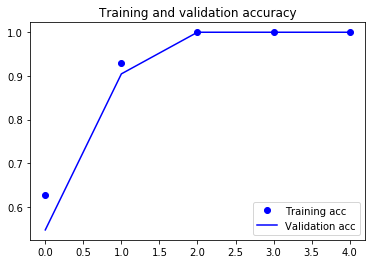

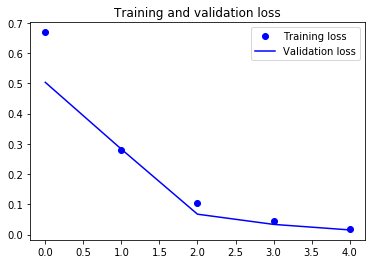

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Katman ve düğüm sayılarında değişiklik yapıp daha iyi bir sonuç elde edip edemeyeceğimize bakacağız.

# KATMANLAR VE DÜĞÜMLER 

In [31]:
# CNN Modelimizi oluşturuyoruz
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
# modelimizin ayrıntılarını listeliyoruz.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 33, 33, 128)       147584    
__________

In [33]:
# Modelimizi compile ediyoruz.
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [34]:
# Normalleştirme yapıyoruz.Resimleri belirli bir aralığa sıkıştırıyoruz.
from keras.preprocessing.image import ImageDataGenerator

# Tüm resimlerimizi revize ediyoruz.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 154 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [35]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 300, 300, 3)
labels batch shape: (10,)


In [36]:
# Modelimizi eğitip ve sonuçları görüntülüyoruz.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5
10/10 [==============================] - 34s 3s/step - loss: 0.4765 - acc: 0.8100 - val_loss: 0.0864 - val_acc: 1.0000
Epoch 2/5
10/10 [==============================] - 32s 3s/step - loss: 0.0449 - acc: 1.0000 - val_loss: 0.0133 - val_acc: 1.0000
Epoch 3/5
10/10 [==============================] - 30s 3s/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 4/5
10/10 [==============================] - 32s 3s/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 5/5
10/10 [==============================] - 33s 3s/step - loss: 7.7191e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000


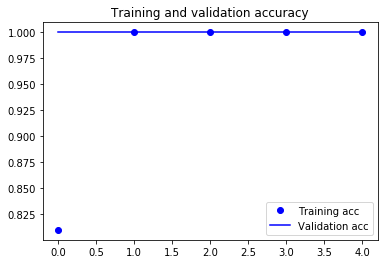

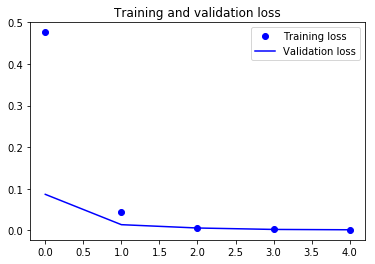

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Katman sayısını arttırdık ve katmanlardaki düğüm sayılarını arttırdık ve neredeyse 1-2 epoch sonunda daha başarılı bir sonuç elde ettik.

# OPTIMIZER

In [46]:
# CNN Modelimizi oluşturuyoruz
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
# modelimizin ayrıntılarını listeliyoruz.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 170528)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               21827712  
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total para

In [48]:
# Modelimizi compile ediyoruz.
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [49]:
# Normalleştirme yapıyoruz.Resimleri belirli bir aralığa sıkıştırıyoruz.
from keras.preprocessing.image import ImageDataGenerator

# Tüm resimlerimizi revize ediyoruz.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 154 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [50]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 300, 300, 3)
labels batch shape: (10,)


In [51]:
# Modelimizi eğitip ve sonuçları görüntülüyoruz.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5
10/10 [==============================] - 15s 2s/step - loss: 0.4003 - acc: 0.7852 - val_loss: 0.2982 - val_acc: 0.8810
Epoch 2/5
10/10 [==============================] - 14s 1s/step - loss: 0.1867 - acc: 0.9296 - val_loss: 0.0649 - val_acc: 1.0000
Epoch 3/5
10/10 [==============================] - 14s 1s/step - loss: 0.0469 - acc: 0.9800 - val_loss: 0.0135 - val_acc: 1.0000
Epoch 4/5
10/10 [==============================] - 13s 1s/step - loss: 0.0136 - acc: 1.0000 - val_loss: 0.0129 - val_acc: 1.0000
Epoch 5/5
10/10 [==============================] - 13s 1s/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000


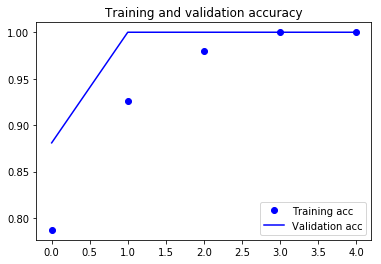

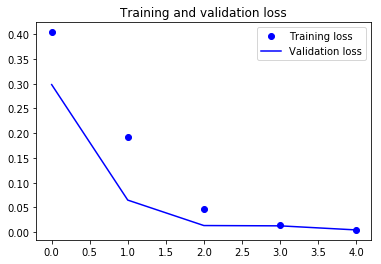

In [52]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Optimizer olarak Adam kullandık ve sonuçlar RMSProp optimizerının verdiği sonuçlara  yakın olsada RMSProptan daha kötü bir sonuç elde ettik.

# EPOCH

In [56]:
# CNN Modelimizi oluşturuyoruz
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # binary çıkışımız olduğu için sigmoid kullandık 
                                                # eğer birden çok çıkışımız olsaydı softmax kullanabilirdik

In [57]:
# modelimizin ayrıntılarını listeliyoruz.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 170528)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               21827712  
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total para

In [58]:
# Modelimizi compile ediyoruz.
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [59]:
# Normalleştirme yapıyoruz.Resimleri belirli bir aralığa sıkıştırıyoruz.
from keras.preprocessing.image import ImageDataGenerator

# Tüm resimlerimizi revize ediyoruz.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 154 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [60]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 300, 300, 3)
labels batch shape: (10,)


In [61]:
# Modelimizi eğitip ve sonuçları görüntülüyoruz.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=15)

Epoch 1/10
30/30 [==============================] - 36s 1s/step - loss: 0.5320 - acc: 0.8698 - val_loss: 0.0744 - val_acc: 1.0000
Epoch 2/10
30/30 [==============================] - 33s 1s/step - loss: 0.0312 - acc: 0.9967 - val_loss: 0.0153 - val_acc: 1.0000
Epoch 3/10
30/30 [==============================] - 36s 1s/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 4/10
30/30 [==============================] - 35s 1s/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 5/10
30/30 [==============================] - 35s 1s/step - loss: 3.0031e-04 - acc: 1.0000 - val_loss: 5.0711e-04 - val_acc: 1.0000
Epoch 6/10
30/30 [==============================] - 35s 1s/step - loss: 4.9494e-05 - acc: 1.0000 - val_loss: 1.2120e-04 - val_acc: 1.0000
Epoch 7/10
30/30 [==============================] - 35s 1s/step - loss: 7.4937e-06 - acc: 1.0000 - val_loss: 6.0966e-05 - val_acc: 1.0000
Epoch 8/10
30/30 [==============================] - 35s 1s/step - 

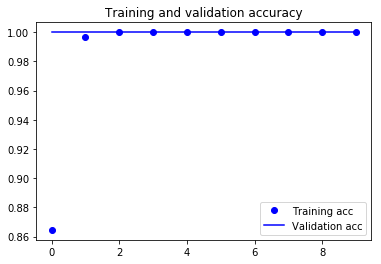

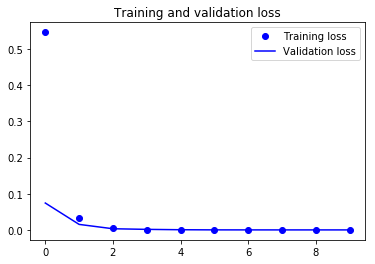

In [62]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Epoch sayısını arttıdık ve başlangıç modelimize göre daha iyi sonuçlar elde ettik neredeyse    2-3 epoch sonra çok yüksek bir başarım oranına ulaştı.

# WEIGHT REGULARIZATION

In [64]:
# CNN Modelimizi oluşturuyoruz
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.01),
                       activity_regularizer=regularizers.l1(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))

In [65]:
# modelimizin ayrıntılarını listeliyoruz.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 170528)            0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               21827712  
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total para

In [66]:
# Modelimizi compile ediyoruz.
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [67]:
# Normalleştirme yapıyoruz.Resimleri belirli bir aralığa sıkıştırıyoruz.
from keras.preprocessing.image import ImageDataGenerator

# Tüm resimlerimizi revize ediyoruz.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 154 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [68]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 300, 300, 3)
labels batch shape: (10,)


In [69]:
# Modelimizi eğitip ve sonuçları görüntülüyoruz.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5
10/10 [==============================] - 19s 2s/step - loss: 2.7426 - acc: 0.5000 - val_loss: 2.2516 - val_acc: 0.5714
Epoch 2/5
10/10 [==============================] - 14s 1s/step - loss: 2.0667 - acc: 0.5065 - val_loss: 1.8757 - val_acc: 0.5000
Epoch 3/5
10/10 [==============================] - 14s 1s/step - loss: 1.7572 - acc: 0.5201 - val_loss: 2.0424 - val_acc: 0.5000
Epoch 4/5
10/10 [==============================] - 15s 2s/step - loss: 1.5933 - acc: 0.4900 - val_loss: 1.4416 - val_acc: 0.5000
Epoch 5/5
10/10 [==============================] - 14s 1s/step - loss: 1.3738 - acc: 0.5036 - val_loss: 1.2911 - val_acc: 0.5000


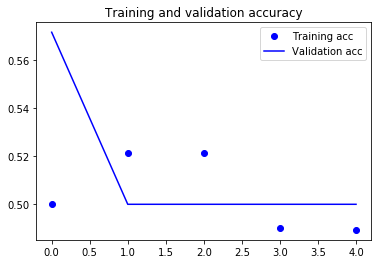

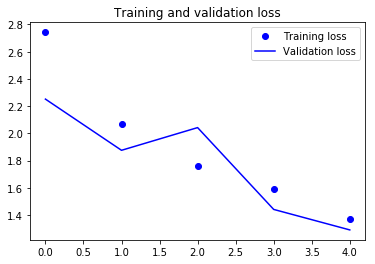

In [70]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Weight değeri ile oynarak daha iyi bir sonuç elde etmeye çalışacağız.

In [71]:
# CNN Modelimizi oluşturuyoruz
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.001),
                       activity_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

In [72]:
# modelimizin ayrıntılarını listeliyoruz.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 170528)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               21827712  
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 129       
Total para

In [73]:
# Modelimizi compile ediyoruz.
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [74]:
# Normalleştirme yapıyoruz.Resimleri belirli bir aralığa sıkıştırıyoruz.
from keras.preprocessing.image import ImageDataGenerator

# Tüm resimlerimizi revize ediyoruz.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 154 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [75]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 300, 300, 3)
labels batch shape: (10,)


In [76]:
# Modelimizi eğitip ve sonuçları görüntülüyoruz.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5
10/10 [==============================] - 17s 2s/step - loss: 1.1247 - acc: 0.6710 - val_loss: 0.7798 - val_acc: 0.5000
Epoch 2/5
10/10 [==============================] - 14s 1s/step - loss: 0.6870 - acc: 0.8290 - val_loss: 0.6182 - val_acc: 1.0000
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.5291 - acc: 0.9900 - val_loss: 0.4683 - val_acc: 1.0000
Epoch 4/5
10/10 [==============================] - 14s 1s/step - loss: 0.4244 - acc: 1.0000 - val_loss: 0.4112 - val_acc: 1.0000
Epoch 5/5
10/10 [==============================] - 14s 1s/step - loss: 0.4047 - acc: 0.9900 - val_loss: 0.3591 - val_acc: 1.0000


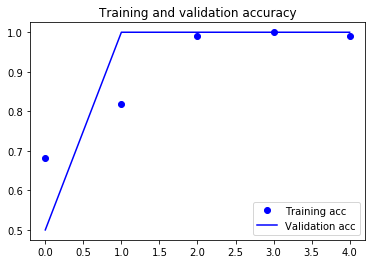

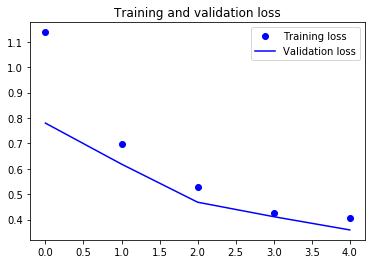

In [77]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Weight Regularizer değerini daha düşüğe çekince modelimiz üzerinde gözle görülür bir şekilde iyileşme sağlandı.

# DATA AUGMENTATION

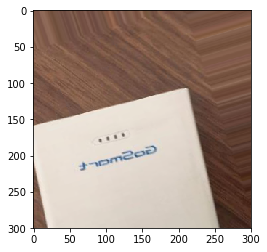

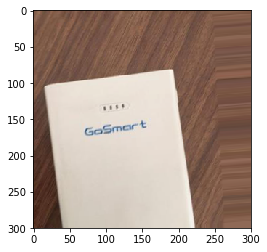

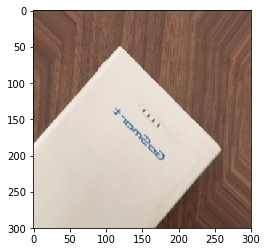

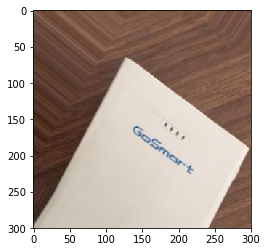

In [82]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_powerbank_dir, fname) for fname in os.listdir(train_powerbank_dir)]

# We pick one image to "augment"
img_path = fnames[8]

# Read the image and resize it
img = image.load_img(img_path, target_size=(300, 300))

# Convert it to a Numpy array with shape (3, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

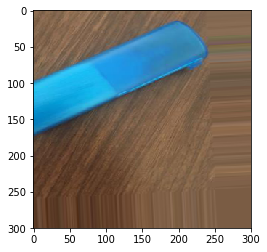

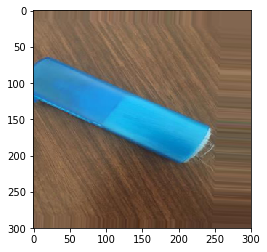

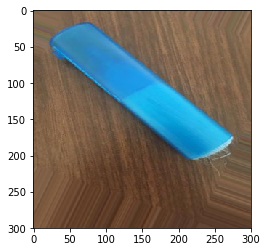

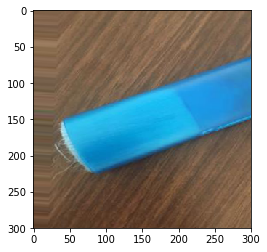

In [84]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_tassel_dir, fname) for fname in os.listdir(train_tassel_dir)]

# We pick one image to "augment"
img_path = fnames[12]

# Read the image and resize it
img = image.load_img(img_path, target_size=(300, 300))

# Convert it to a Numpy array with shape (3, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [85]:
# CNN Modelimizi oluşturuyoruz
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [86]:
# Modelimizin ayrıntılarını listeliyoruz.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 170528)            0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               21827712  
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total para

In [89]:
# Modelimizi compile ediyoruz.
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [90]:
# Data Augmentation için gerekli parametreleri giriyoruz.
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [91]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 154 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [92]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 300, 300, 3)
labels batch shape: (10,)


In [93]:
# Modelimizi eğitip ve sonuçları görüntülüyoruz.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5
10/10 [==============================] - 15s 1s/step - loss: 1.0625 - acc: 0.5800 - val_loss: 0.3569 - val_acc: 0.7857
Epoch 2/5
10/10 [==============================] - 14s 1s/step - loss: 0.2135 - acc: 0.9461 - val_loss: 0.1058 - val_acc: 1.0000
Epoch 3/5
10/10 [==============================] - 14s 1s/step - loss: 0.0752 - acc: 1.0000 - val_loss: 0.0554 - val_acc: 1.0000
Epoch 4/5
10/10 [==============================] - 13s 1s/step - loss: 0.0241 - acc: 1.0000 - val_loss: 0.0163 - val_acc: 1.0000
Epoch 5/5
10/10 [==============================] - 13s 1s/step - loss: 0.0130 - acc: 1.0000 - val_loss: 0.0088 - val_acc: 1.0000


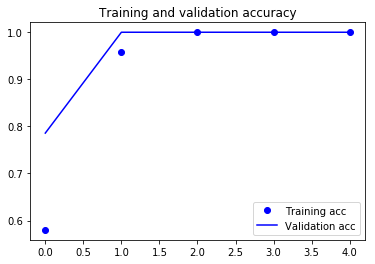

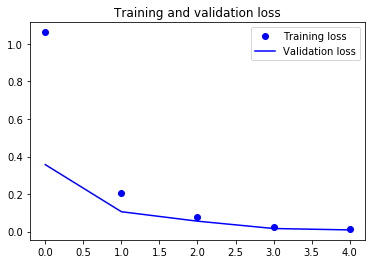

In [94]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Data Augmentation uygulayarak modelimiz 1-2 epoch sonunda büyük bir başarı yüzdesi yakaladığını görüyoruz.

# DROP-OUT

In [102]:
# CNN Modelimizi oluşturuyoruz
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [103]:
# modelimizin ayrıntılarını listeliyoruz.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 35, 35, 128)       0         
__________

In [12]:
# Modelimizi compile ediyoruz.
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [24]:
# Tüm resimlerimizi revize ediyoruz.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 154 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [106]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 300, 300, 3)
labels batch shape: (10,)


In [107]:
# Modelimizi eğitip ve sonuçları görüntülüyoruz.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5
10/10 [==============================] - 33s 3s/step - loss: 0.7710 - acc: 0.4900 - val_loss: 0.6181 - val_acc: 1.0000
Epoch 2/5
10/10 [==============================] - 31s 3s/step - loss: 0.3858 - acc: 0.9289 - val_loss: 0.2571 - val_acc: 1.0000
Epoch 3/5
10/10 [==============================] - 32s 3s/step - loss: 0.0565 - acc: 1.0000 - val_loss: 0.0693 - val_acc: 1.0000
Epoch 4/5
10/10 [==============================] - 33s 3s/step - loss: 0.0249 - acc: 1.0000 - val_loss: 0.0307 - val_acc: 1.0000
Epoch 5/5
10/10 [==============================] - 32s 3s/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0177 - val_acc: 1.0000


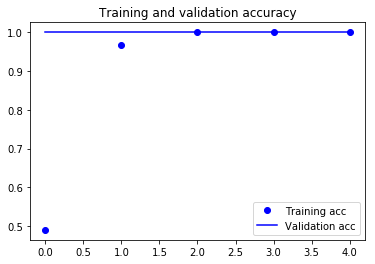

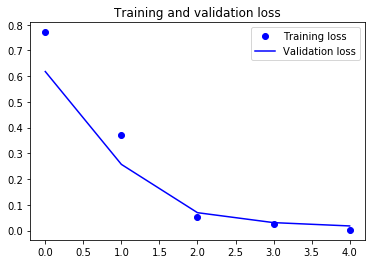

In [109]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Drop-out ile sonuçların kötü çıktığını görüyoruz çünkü overfitting yok ve drop-out eklemeye gerek yoktur.

# BEST MODEL

In [17]:
# CNN Modelimizi oluşturuyoruz
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
# Modelimizi compile ediyoruz.
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
# Data Augmentation için gerekli parametreleri giriyoruz.
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 154 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 300, 300, 3)
labels batch shape: (10,)


In [22]:
# Modelimizi eğitip ve sonuçları görüntülüyoruz.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=15)

Epoch 1/10
30/30 [==============================] - 84s 3s/step - loss: 0.3998 - acc: 0.8184 - val_loss: 0.0856 - val_acc: 1.0000
Epoch 2/10
30/30 [==============================] - 85s 3s/step - loss: 0.0124 - acc: 1.0000 - val_loss: 0.0096 - val_acc: 1.0000
Epoch 3/10
30/30 [==============================] - 85s 3s/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 4/10
30/30 [==============================] - 83s 3s/step - loss: 3.2139e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 5/10
30/30 [==============================] - 85s 3s/step - loss: 3.6130e-05 - acc: 1.0000 - val_loss: 2.3264e-04 - val_acc: 1.0000
Epoch 6/10
30/30 [==============================] - 85s 3s/step - loss: 2.1570e-05 - acc: 1.0000 - val_loss: 8.1702e-05 - val_acc: 1.0000
Epoch 7/10
30/30 [==============================] - 87s 3s/step - loss: 1.6399e-06 - acc: 1.0000 - val_loss: 2.4830e-05 - val_acc: 1.0000
Epoch 8/10
30/30 [==============================] - 92s 3s/ste

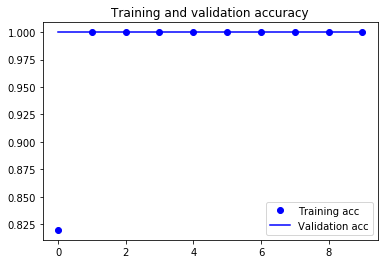

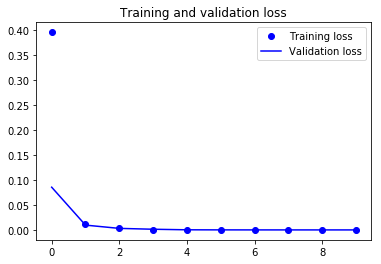

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## En iyi modeli oluşturmak için gerekli parametreleri girdik ve yüksek sonuçlar aldık.

## Modelimizi iyileştirmek için veri sayısı arttırılabilir.